In [1]:
import folium
import geopandas as gpd
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns
from folium import Choropleth, Marker
from folium.plugins import HeatMap, MarkerCluster
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans 
from sklearn.feature_selection import mutual_info_regression

In [2]:
conflicts_file_path = "../Dados/Ukraine_conflicts.csv"

df_conflicts = pd.read_csv(conflicts_file_path)

display(df_conflicts)

data_id  iso event_id_cnty  event_id_no_cnty    event_date  year  \
0      9415087  804      UKR64033             64033  15 July 2022  2022   
1      9415107  804      UKR63274             63274  15 July 2022  2022   
2      9415126  804      UKR63181             63181  15 July 2022  2022   
3      9415131  804      UKR63344             63344  15 July 2022  2022   
4      9415142  804      UKR63275             63275  15 July 2022  2022   
...        ...  ...           ...               ...           ...   ...   
39386  9092833  804      UKR23175             23175  16 July 2019  2019   
39387  9092834  804      UKR23176             23176  16 July 2019  2019   
39388  9092835  804      UKR23560             23560  16 July 2019  2019   
39389  9175245  804      UKR23178             23178  16 July 2019  2019   
39390  9175246  804      UKR23182             23182  16 July 2019  2019   

       time_precision                  event_type  \
0                   1  Explosions/Remote violence   
1                   1      Strategic developments   
2                   1  Explosions/Remote violence   
3                   1  Explosions/Remote violence   
4                   1      Strategic developments   
...               ...                         ...   
39386               1  Violence against civilians   
39387               1                    Protests   
39388               1                    Protests   
39389               1                     Battles   
39390               1  Explosions/Remote violence   

                          sub_event_type  \
0      Shelling/artillery/missile attack   
1                  Disrupted weapons use   
2                       Air/drone strike   
3      Shelling/artillery/missile attack   
4                  Disrupted weapons use   
...                                  ...   
39386                             Attack   
39387                   Peaceful protest   
39388                   Peaceful protest   
39389                        Armed clash   
39390  Shelling/artillery/missile attack   

                                            actor1  ...  \
0               Military Forces of Ukraine (2019-)  ...   
1               Military Forces of Ukraine (2019-)  ...   
2      Military Forces of Russia (2000-) Air Force  ...   
3                Military Forces of Russia (2000-)  ...   
4               Military Forces of Ukraine (2019-)  ...   
...                                            ...  ...   
39386       Military Forces of Ukraine (2014-2019)  ...   
39387                         Protesters (Ukraine)  ...   
39388                         Protesters (Ukraine)  ...   
39389      NAF: United Armed Forces of Novorossiya  ...   
39390      NAF: United Armed Forces of Novorossiya  ...   

                     location  latitude longitude geo_precision  \
0                   Melitopol   46.8489   35.3653             1   
1                Bila Tserkva   49.8094   30.1121             2   
2                      Dnipro   48.4593   35.0386             1   
3                   Slovyansk   48.8533   37.6065             1   
4                       Odesa   46.4639   30.7386             3   
...                       ...       ...       ...           ...   
39386                   Odesa   46.4639   30.7386             1   
39387  Kyiv - Shevchenkivskyi   50.4646   30.4655             1   
39388                   Odesa   46.4639   30.7386             1   
39389            Novotroitske   47.7158   37.5919             2   
39390              Mykolaivka   47.6539   37.6793             2   

                                                  source    source_scale  \
0                                                 061.ua     Subnational   
1                                             24 Channel        National   
2                                             24 Channel        National   
3                                             24 Channel        National   
4                                             

In [3]:
def string_list_sep(string_list: list) -> list: 
    """
    Função auxiliar para separar dar espaço em strings na lista
    """
    string_sep = lambda x: x.replace(' ', '\n').replace('/', '/\n')
    
    return list(map(string_sep, string_list))

In [4]:
def graph_generator(G: nx.Graph, pos: dict, n_events: int, n_subevents: int):
    ...

In [5]:
attrs = ['event_date', 'year', 'event_type', 'sub_event_type', 'fatalities', 'location', 'latitude', 'longitude']

df_conflicts_2022 = df_conflicts[df_conflicts['year'] >= 2022]

df_conflicts_2022 = df_conflicts_2022[attrs]

display(df_conflicts_2022)

event_date  year                  event_type  \
0         15 July 2022  2022  Explosions/Remote violence   
1         15 July 2022  2022      Strategic developments   
2         15 July 2022  2022  Explosions/Remote violence   
3         15 July 2022  2022  Explosions/Remote violence   
4         15 July 2022  2022      Strategic developments   
...                ...   ...                         ...   
13450  01 January 2022  2022                    Protests   
13451  01 January 2022  2022                    Protests   
13452  01 January 2022  2022                    Protests   
13453  01 January 2022  2022                    Protests   
13454  01 January 2022  2022  Explosions/Remote violence   

                          sub_event_type  fatalities      location  latitude  \
0      Shelling/artillery/missile attack           0     Melitopol   46.8489   
1                  Disrupted weapons use           0  Bila Tserkva   49.8094   
2                       Air/drone strike           0        Dnipro   48.4593   
3      Shelling/artillery/missile attack           1     Slovyansk   48.8533   
4                  Disrupted weapons use           0         Odesa   46.4639   
...                                  ...         ...           ...       ...   
13450                   Peaceful protest           0    Kryvyi Rih   47.9093   
13451                   Peaceful protest           0          Lviv   49.8407   
13452                   Peaceful protest           0          Kyiv   50.4496   
13453                   Peaceful protest           0         Odesa   46.4639   
13454  Shelling/artillery/missile attack           0         Styla   47.6936   

       longitude  
0        35.3653  
1        30.1121  
2        35.0386  
3        37.6065  
4        30.7386  
...          ...  
13450    33.3933  
13451    24.0305  
13452    30.5224  
13453    30.7386  
13454    37.8375  

[13455 rows x 8 columns]

In [6]:
df_subevent_type = df_conflicts_2022.groupby(['event_type', 'sub_event_type'])[['fatalities']].sum().reset_index()

display(df_subevent_type)

event_type                       sub_event_type  \
0                      Battles                          Armed clash   
1                      Battles         Government regains territory   
2                      Battles  Non-state actor overtakes territory   
3   Explosions/Remote violence                     Air/drone strike   
4   Explosions/Remote violence                              Grenade   
5   Explosions/Remote violence        Remote explosive/landmine/IED   
6   Explosions/Remote violence    Shelling/artillery/missile attack   
7                     Protests   Excessive force against protesters   
8                     Protests                     Peaceful protest   
9                     Protests            Protest with intervention   
10                       Riots                         Mob violence   
11                       Riots                Violent demonstration   
12      Strategic developments                            Agreement   
13      Strategic developments                              Arrests   
14      Strategic developments             Change to group/activity   
15      Strategic developments                Disrupted weapons use   
16      Strategic developments     Headquarters or base established   
17      Strategic developments         Looting/property destruction   
18      Strategic developments    Non-violent transfer of territory   
19      Strategic developments                                Other   
20  Violence against civilians       Abduction/forced disappearance   
21  Violence against civilians                               Attack   
22  Violence against civilians                      Sexual violence   

    fatalities  
0         5580  
1           56  
2           44  
3         1533  
4            6  
5           96  
6         3277  
7            4  
8            0  
9            0  
10           0  
11           0  
12           0  
13           0  
14           0  
15           0  
16           0  
17           0  
18           0  
19           0  
20           0  
21         966  
22           5

In [7]:
df_event_type = df_subevent_type.groupby('event_type')[['fatalities']].sum().reset_index()

display(df_event_type)

event_type  fatalities
0                     Battles        5680
1  Explosions/Remote violence        4912
2                    Protests           4
3                       Riots           0
4      Strategic developments           0
5  Violence against civilians         971

In [8]:
aux_subevent_fatal = df_subevent_type[df_subevent_type['fatalities'] > 0]
aux_event_fatal = df_event_type[df_event_type['fatalities'] > 0]

events_list = string_list_sep(aux_event_fatal.event_type.tolist())
fatal_per_event_list = aux_event_fatal.fatalities.tolist()

events_fromsub_list = string_list_sep(aux_subevent_fatal.event_type.tolist())
subevents_list = string_list_sep(aux_subevent_fatal.sub_event_type.tolist())
fatal_per_subevent_list = aux_subevent_fatal.fatalities.tolist()

In [9]:
fatalities_graph = nx.Graph()

n_subevents = len(subevents_list)
n_events = len(events_list)

root = "Ukraine Fatalities\nin 2022"

pos = {root: (n_subevents//2, 6)}

In [10]:
for i in range(n_subevents):
    node = events_fromsub_list[i]
    leaf = subevents_list[i]
    
    fatalities_graph.add_edge(node, leaf, weight = fatal_per_subevent_list[i])
    
    pos[leaf] = (i, 1 - i%(n_events - 1))

for i in range(n_events):
    node = events_list[i]
    
    fatalities_graph.add_edge(root, node, weight = fatal_per_event_list[i])
    
    pos[node] = (i*2 + n_subevents//n_events, 4 - i%2)

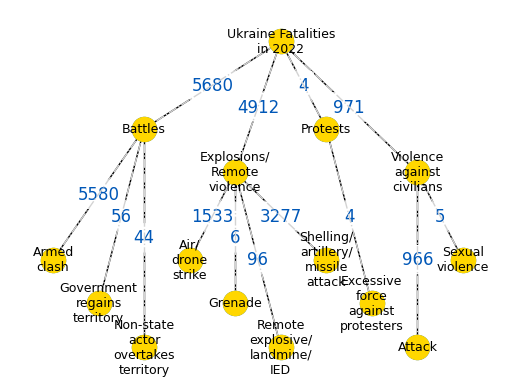

In [11]:
nx.draw_networkx(fatalities_graph, pos = pos, with_labels = True, font_size = 9)

nx.draw_networkx_edge_labels(fatalities_graph, 
                             pos = pos, 
                             edge_labels = nx.get_edge_attributes(fatalities_graph, 'weight'), 
                             rotate = False, 
                             font_size = 12,
                             font_color = '#0057b7',
                             alpha = 1
                            )

nx.draw_networkx_nodes(fatalities_graph, 
                       pos = pos,
                       node_color = '#ffd700'
                      )

nx.draw_networkx_edges(fatalities_graph, 
                       pos = pos,
                       style = '-.',
                       edge_color = 'LightGray'
                      )

plt.axis("off")
plt.show()

In [12]:
df_fatalities_per_area = df_conflicts_2022.groupby(['location', 'latitude', 'longitude'])[['fatalities']].sum()

df_fatalities_per_area = df_fatalities_per_area[df_fatalities_per_area['fatalities'] > 0].reset_index()

display(df_fatalities_per_area)

location  latitude  longitude  fatalities
0      Adamivka   48.9430    37.4481           2
1     Andriivka   47.1761    33.0463          10
2       Antopil   50.5998    26.4405           9
3    Apostolove   47.6600    33.7137           4
4      Avdiivka   48.1394    37.7497          97
..          ...       ...        ...         ...
480    Zolochiv   50.2799    35.9818          23
481      Zolote   48.6926    38.5145          23
482    Zolote-5   48.6719    38.5600           2
483       Zorya   47.2958    37.6081           2
484     Zoryane   48.0355    37.3966           1

[485 rows x 4 columns]

In [13]:
conflict_map = folium.Map(location = [47.8, 31], tiles='cartodbpositron', zoom_start=6)

mc = MarkerCluster()

for idx, row in df_fatalities_per_area.iterrows():
    if not np.isnan(row['latitude']) and not np.isnan(row['longitude']):
        for i in range(row['fatalities']):
            mc.add_child(Marker([row['latitude'], row['longitude']]))

conflict_map.add_child(mc)
        
display(conflict_map)

In [14]:
conflict_map = folium.Map(location = [47.8, 31], tiles='cartodbpositron', zoom_start=6)

mc = MarkerCluster()

for idx, row in df_fatalities_per_area.iterrows():
    if not np.isnan(row['latitude']) and not np.isnan(row['longitude']):
        for i in range(row['fatalities']):
            mc.add_child(Marker([row['latitude'], row['longitude']]))

conflict_map.add_child(mc)

HeatMap(data = df_fatalities_per_area[['latitude', 'longitude']], radius = 15).add_to(conflict_map)
        
display(conflict_map)

In [15]:
df_2022 = df_conflicts[df_conflicts['year'] >= 2022]

X = df_2022.copy()
y = X.pop('fatalities')

for col in X.select_dtypes('object'):
    X[col], _ = X[col].factorize()
    
disc_features = X.dtypes == int

In [16]:
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features = discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, disc_features)
mi_scores

inter2              0.141577
actor2              0.133856
interaction         0.130879
event_id_no_cnty    0.099980
data_id             0.063709
notes               0.059915
source              0.059747
event_id_cnty       0.059055
latitude            0.038860
event_date          0.038433
timestamp           0.038203
sub_event_type      0.035851
location            0.035335
admin3              0.034876
longitude           0.032535
source_scale        0.031500
geo_precision       0.025802
assoc_actor_1       0.021663
admin2              0.021001
assoc_actor_2       0.019147
event_type          0.016359
admin1              0.013159
actor1              0.012248
inter1              0.010577
iso                 0.009227
region              0.004245
time_precision      0.003948
year                0.002125
country             0.000962
iso3                0.000000
Name: MI Scores, dtype: float64

In [17]:
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD, PCA
import umap

In [18]:
fatalities_features = ['fatalities', 'event_type', 'sub_event_type', 'location', 'event_date']

df_fatal = df_2022[fatalities_features]

display(df_fatal)

fatalities                  event_type  \
0               0  Explosions/Remote violence   
1               0      Strategic developments   
2               0  Explosions/Remote violence   
3               1  Explosions/Remote violence   
4               0      Strategic developments   
...           ...                         ...   
13450           0                    Protests   
13451           0                    Protests   
13452           0                    Protests   
13453           0                    Protests   
13454           0  Explosions/Remote violence   

                          sub_event_type      location       event_date  
0      Shelling/artillery/missile attack     Melitopol     15 July 2022  
1                  Disrupted weapons use  Bila Tserkva     15 July 2022  
2                       Air/drone strike        Dnipro     15 July 2022  
3      Shelling/artillery/missile attack     Slovyansk     15 July 2022  
4                  Disrupted weapons use         Odesa     15 July 2022  
...                                  ...           ...              ...  
13450                   Peaceful protest    Kryvyi Rih  01 January 2022  
13451                   Peaceful protest          Lviv  01 January 2022  
13452                   Peaceful protest          Kyiv  01 January 2022  
13453                   Peaceful protest         Odesa  01 January 2022  
13454  Shelling/artillery/missile attack         Styla  01 January 2022  

[13455 rows x 5 columns]

In [19]:
import re

def get_month(date: str) -> str:
    pattern = r"\b[A-Za-z]+"
    
    return re.findall(pattern, date)[0]

df_fatal_cp = df_fatal.copy()

df_fatal_cp['month'] = df_fatal_cp['event_date'].apply(get_month)

display(df_fatal_cp)

fatalities                  event_type  \
0               0  Explosions/Remote violence   
1               0      Strategic developments   
2               0  Explosions/Remote violence   
3               1  Explosions/Remote violence   
4               0      Strategic developments   
...           ...                         ...   
13450           0                    Protests   
13451           0                    Protests   
13452           0                    Protests   
13453           0                    Protests   
13454           0  Explosions/Remote violence   

                          sub_event_type      location       event_date  \
0      Shelling/artillery/missile attack     Melitopol     15 July 2022   
1                  Disrupted weapons use  Bila Tserkva     15 July 2022   
2                       Air/drone strike        Dnipro     15 July 2022   
3      Shelling/artillery/missile attack     Slovyansk     15 July 2022   
4                  Disrupted weapons use         Odesa     15 July 2022   
...                                  ...           ...              ...   
13450                   Peaceful protest    Kryvyi Rih  01 January 2022   
13451                   Peaceful protest          Lviv  01 January 2022   
13452                   Peaceful protest          Kyiv  01 January 2022   
13453                   Peaceful protest         Odesa  01 January 2022   
13454  Shelling/artillery/missile attack         Styla  01 January 2022   

         month  
0         July  
1         July  
2         July  
3         July  
4         July  
...        ...  
13450  January  
13451  January  
13452  January  
13453  January  
13454  January  

[13455 rows x 6 columns]

In [20]:
df_attacks_month = df_fatal_cp[df_fatal_cp['fatalities'] > 1]

df_attacks_month_cp = df_attacks_month[['event_type', 'location', 'fatalities', 'month']]

df_attacks_month_cp = df_attacks_month_cp.groupby(['event_type', 'location', 'month']).fatalities.agg([np.size, np.sum, np.mean])

df_attacks_month_cp = df_attacks_month_cp.reset_index()

# df_fatal_atacks_month = df_attacks_month.value_counts('fatalities')

# df_fatal_atacks_month = df_fatal_atacks_month.reset_index()

print(cols := df_attacks_month_cp.columns)

for col in cols:
    print(f"{col} -> {len(df_attacks_month_cp[col].unique().tolist())} unique vals")

display(df_attacks_month_cp)

Index(['event_type', 'location', 'month', 'size', 'sum', 'mean'], dtype='object')
event_type -> 4 unique vals
location -> 317 unique vals
month -> 7 unique vals
size -> 12 unique vals
sum -> 72 unique vals
mean -> 100 unique vals


event_type    location     month  size  sum  mean
0                       Battles   Andriivka       May     1   10  10.0
1                       Battles    Avdiivka     April     1    2   2.0
2                       Battles    Avdiivka       May     1   10  10.0
3                       Battles     Bakhmut      June     1   10  10.0
4                       Battles     Bakhmut       May     1   10  10.0
..                          ...         ...       ...   ...  ...   ...
557  Violence against civilians     Yahidne     March     1   10  10.0
558  Violence against civilians   Yehorivka     March     1    2   2.0
559  Violence against civilians  Zaporizhia  February     1    2   2.0
560  Violence against civilians  Zaporizhia     March     2    5   2.5
561  Violence against civilians  Zdvyzhivka     March     1    3   3.0

[562 rows x 6 columns]

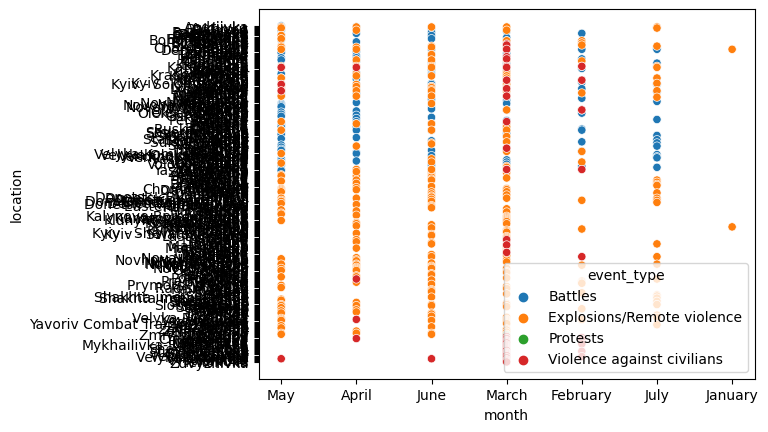

In [21]:
sns.scatterplot(x = 'month', y = 'location', hue = 'event_type', data = df_attacks_month_cp)

plt.show()

In [22]:
df_attacks_month = df_fatal_cp[df_fatal_cp['fatalities'] > 5]

df_attacks_month_cp2 = df_attacks_month[['event_type', 'sub_event_type', 'location', 'fatalities', 'month']]

df_attacks_month_cp2 = df_attacks_month_cp2.groupby(['event_type', 'sub_event_type', 'location']).fatalities.agg([np.size, np.sum])

df_attacks_month_cp2 = df_attacks_month_cp2.reset_index()

# df_fatal_atacks_month = df_attacks_month.value_counts('fatalities')

# df_fatal_atacks_month = df_fatal_atacks_month.reset_index()

print(cols := df_attacks_month_cp2.columns)

for col in cols:
    print(f"{col} -> {len(df_attacks_month_cp2[col].unique().tolist())} unique vals")

display(df_attacks_month_cp2)

Index(['event_type', 'sub_event_type', 'location', 'size', 'sum'], dtype='object')
event_type -> 3 unique vals
sub_event_type -> 7 unique vals
location -> 174 unique vals
size -> 11 unique vals
sum -> 65 unique vals


event_type sub_event_type      location  size  sum
0                       Battles    Armed clash     Andriivka     1   10
1                       Battles    Armed clash      Avdiivka     1   10
2                       Battles    Armed clash       Bakhmut     2   20
3                       Battles    Armed clash    Barvinkove     1   10
4                       Battles    Armed clash    Baryshivka     1   40
..                          ...            ...           ...   ...  ...
220  Violence against civilians         Attack      Pravdyne     1    7
221  Violence against civilians         Attack  Shevchenkove     1    6
222  Violence against civilians         Attack  Staryi Bykiv     1    6
223  Violence against civilians         Attack  Vysokopillia     1   25
224  Violence against civilians         Attack       Yahidne     1   10

[225 rows x 5 columns]

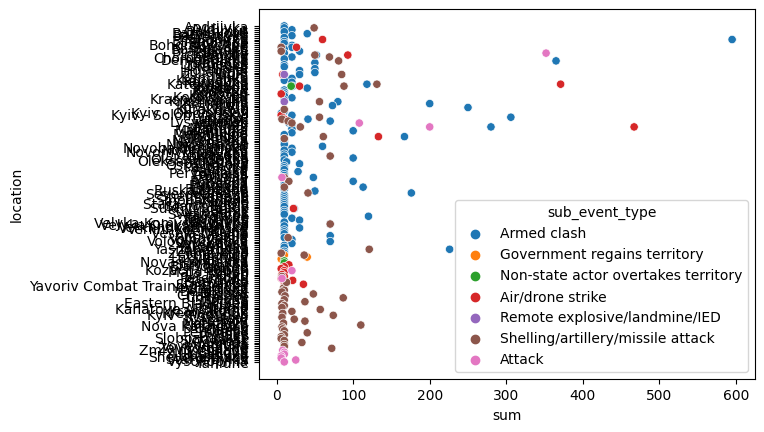

In [23]:
sns.scatterplot(x = 'sum', y = 'location', hue = 'sub_event_type', data = df_attacks_month_cp2)

plt.show()

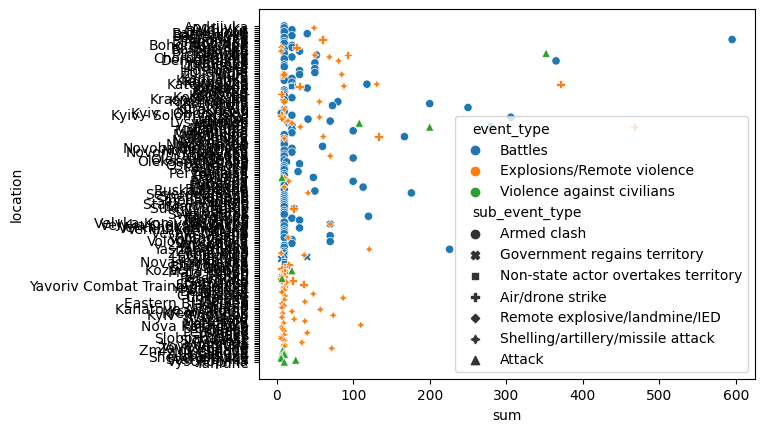

In [24]:
sns.scatterplot(x = 'sum', y = 'location', hue = 'event_type', data = df_attacks_month_cp2, style = 'sub_event_type')

plt.show()

In [25]:
df_fatal_group = df_fatal.groupby(['event_type', 'location'])[['fatalities']].sum()

df_fatal_group = df_fatal_group[df_fatal_group['fatalities'] > 0]

df_fatal_group = df_fatal_group.reset_index()

display(df_fatal_group)

event_type      location  fatalities
0                       Battles     Andriivka          10
1                       Battles      Avdiivka          13
2                       Battles       Bakhmut          20
3                       Battles       Balovne           3
4                       Battles    Barvinkove          10
..                          ...           ...         ...
585  Violence against civilians  Vysokopillia          27
586  Violence against civilians       Yahidne          11
587  Violence against civilians     Yehorivka           2
588  Violence against civilians    Zaporizhia           9
589  Violence against civilians    Zdvyzhivka           3

[590 rows x 3 columns]

In [26]:
df_date_fatal = df_fatal.groupby(['event_date', 'event_type', 'sub_event_type'])[['fatalities']].sum()

df_date_fatal = df_date_fatal[df_date_fatal['fatalities'] > 5] 

df_date_fatal = df_date_fatal.reset_index()

display(df_date_fatal)

event_date                  event_type  \
0    01 April 2022                     Battles   
1     01 July 2022  Explosions/Remote violence   
2     01 June 2022                     Battles   
3     01 June 2022  Explosions/Remote violence   
4    01 March 2022                     Battles   
..             ...                         ...   
260    30 May 2022  Violence against civilians   
261  31 March 2022                     Battles   
262  31 March 2022  Explosions/Remote violence   
263    31 May 2022                     Battles   
264    31 May 2022  Explosions/Remote violence   

                        sub_event_type  fatalities  
0                          Armed clash          78  
1                     Air/drone strike          21  
2                          Armed clash          41  
3    Shelling/artillery/missile attack          11  
4                          Armed clash          12  
..                                 ...         ...  
260                             Attack          25  
261                        Armed clash         101  
262  Shelling/artillery/missile attack         100  
263                        Armed clash           6  
264  Shelling/artillery/missile attack           9  

[265 rows x 4 columns]

<Axes: xlabel='fatalities', ylabel='event_date'>

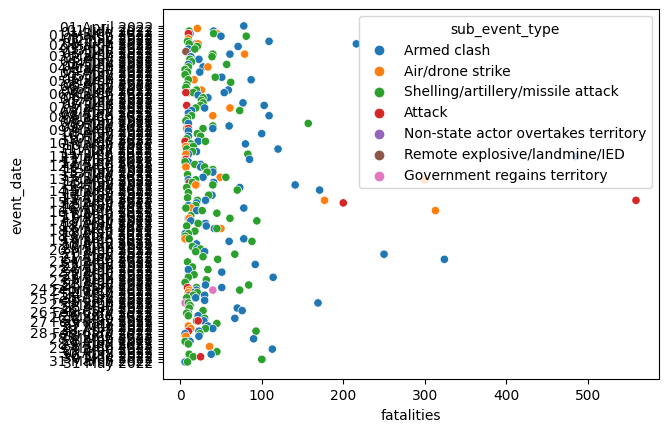

In [27]:
sns.scatterplot(x = "fatalities", y = "event_date", hue = "sub_event_type", data = df_date_fatal)

In [28]:
from kmodes.kmodes import KModes

In [29]:
df_fatal_cp_aux = df_fatal_cp[df_fatal_cp['fatalities'] > 10]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 607.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 607.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 607.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 607.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 607.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2, cost: 497.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 495.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, it

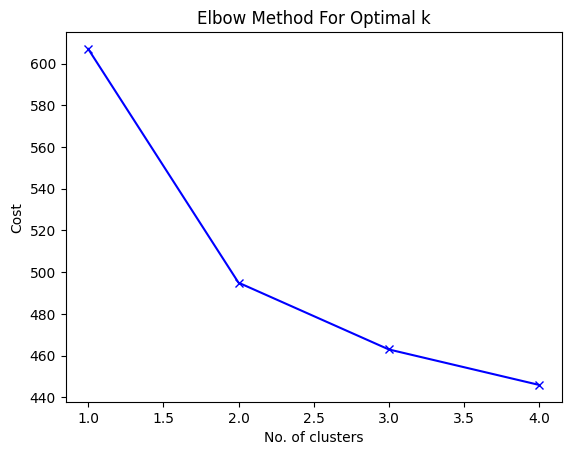

In [30]:
data = df_fatal_cp_aux.copy()

cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(data)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [31]:
data = df_fatal_cp_aux.copy()

kmode = KModes(n_clusters = 4, init = 'random', n_init = 5, verbose = 1)
clusters = kmode.fit_predict(data)

data.insert(0, "Cluster", clusters, True)

display(data)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 14, cost: 480.0
Run 1, iteration: 2/100, moves: 1, cost: 480.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 25, cost: 455.0
Run 2, iteration: 2/100, moves: 0, cost: 455.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 44, cost: 459.0
Run 3, iteration: 2/100, moves: 8, cost: 454.0
Run 3, iteration: 3/100, moves: 5, cost: 454.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 55, cost: 454.0
Run 4, iteration: 2/100, moves: 11, cost: 453.0
Run 4, iteration: 3/100, moves: 0, cost: 453.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 6, cost: 456.0
Run 5, iteration: 2/100, moves: 0, cost: 456.0
Best run was number 4


Cluster  fatalities                  event_type  \
104          3          24  Explosions/Remote violence   
122          0          62                     Battles   
136          0          49                     Battles   
419          3          11  Explosions/Remote violence   
564          0         120                     Battles   
...        ...         ...                         ...   
11702        3          15  Explosions/Remote violence   
11709        0          13                     Battles   
11716        0          20                     Battles   
11717        0          20                     Battles   
11821        0          50                     Battles   

                          sub_event_type    location        event_date  \
104    Shelling/artillery/missile attack   Vinnytsia      14 July 2022   
122                          Armed clash     Donetsk      14 July 2022   
136                          Armed clash     Luhansk      14 July 2022   
419    Shelling/artillery/missile attack    Chkalove      13 July 2022   
564                          Armed clash   Tavriyske      11 July 2022   
...                                  ...         ...               ...   
11702  Shelling/artillery/missile attack  Volnovakha  26 February 2022   
11709                        Armed clash     Oleshky  26 February 2022   
11716                        Armed clash     Kobleve  26 February 2022   
11717                        Armed clash     Kobleve  26 February 2022   
11821                        Armed clash    Schastia  24 February 2022   

          month  
104        July  
122        July  
136        July  
419        July  
564        July  
...         ...  
11702  February  
11709  February  
11716  February  
11717  February  
11821  February  

[139 rows x 7 columns]

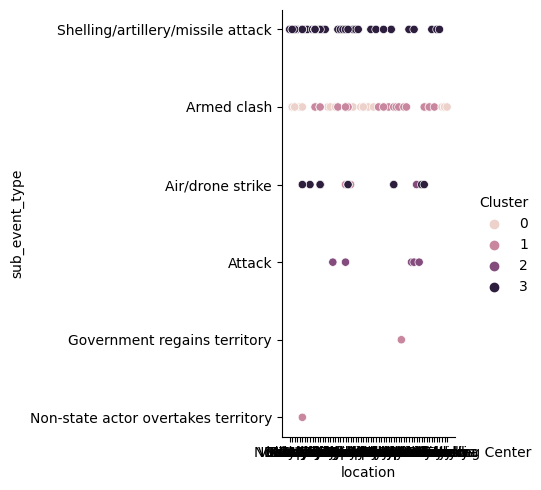

In [32]:
sns.relplot(x = 'location', y = 'sub_event_type', hue = "Cluster", data = data)

In [33]:
# df_fatal_per_loc = df_2022[['latitude', 'longitude', 'fatalities']]

df_fatal_per_loc = df_2022.groupby(['latitude', 'longitude'])[['fatalities']].sum()

df_fatal_per_loc = df_fatal_per_loc[df_fatal_per_loc['fatalities'] > 10]

df_fatal_per_loc = df_fatal_per_loc.reset_index()

display(df_fatal_per_loc)

latitude  longitude  fatalities
0     43.3890    36.5190          37
1     45.2549    30.2037          72
2     46.0266    30.3702          21
3     46.3732    32.5624         123
4     46.4639    30.7386          14
..        ...        ...         ...
121   50.9594    28.6385          26
122   51.0833    32.1500         200
123   51.2403    33.2026          13
124   51.3456    31.2764          11
125   51.5055    31.2849         221

[126 rows x 3 columns]

In [34]:
kmeans = KMeans(n_clusters = 5)

df_fatal_per_loc['cluster'] = kmeans.fit_predict(df_fatal_per_loc)
df_fatal_per_loc['cluster'] = df_fatal_per_loc['cluster'].astype('category')

display(df_fatal_per_loc)

latitude  longitude  fatalities cluster
0     43.3890    36.5190          37       1
1     45.2549    30.2037          72       1
2     46.0266    30.3702          21       1
3     46.3732    32.5624         123       3
4     46.4639    30.7386          14       1
..        ...        ...         ...     ...
121   50.9594    28.6385          26       1
122   51.0833    32.1500         200       3
123   51.2403    33.2026          13       1
124   51.3456    31.2764          11       1
125   51.5055    31.2849         221       3

[126 rows x 4 columns]

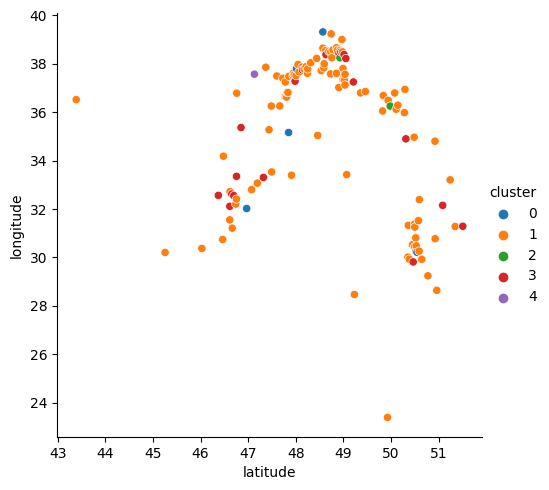

In [35]:
sns.relplot(x = "latitude", y = "longitude", hue = "cluster", data = df_fatal_per_loc)

In [71]:
dfs = df_2022.copy()

dfs.drop(['year', 'iso', 'time_precision', 
          'event_id_no_cnty', 'data_id', 'geo_precision',
          'notes', 'iso3', 'event_id_cnty', 'source', 'source_scale', 'region',
         'country'], axis = 1, inplace = True)

# matrix_corr = dfs.corr()

# print(matrix_corr['location'].head())

# matrix_corr

In [72]:
cols_corr = dfs.columns

print(cols_corr)

Index(['event_date', 'event_type', 'sub_event_type', 'actor1', 'assoc_actor_1',
       'inter1', 'actor2', 'assoc_actor_2', 'inter2', 'interaction', 'admin1',
       'admin2', 'admin3', 'location', 'latitude', 'longitude', 'fatalities',
       'timestamp'],
      dtype='object')


In [73]:
import scipy.stats as ss
import seaborn as sns

def cramers_v(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

confusion_matrix = pd.crosstab(dfs["sub_event_type"], dfs["event_type"])
cramers_v(confusion_matrix.values)

0.9993677829004163

In [74]:
cnf_matrix = list()

for col in cols_corr:
    aux = list()
    for col_2 in cols_corr:
        aux_lala = pd.crosstab(dfs[col], dfs[col_2])
        aux.append(cramers_v(aux_lala.values))
    cnf_matrix.append(aux)

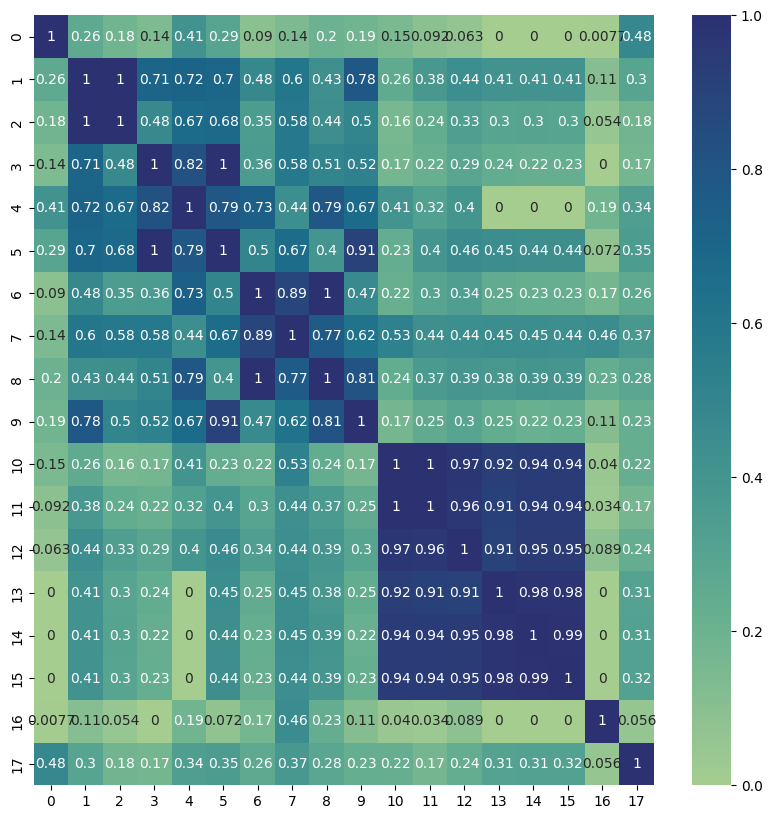

In [67]:
fig, ax = plt.subplots(figsize = (10, 10))
ax = sns.heatmap(cnf_matrix, cmap = 'crest', annot = True)

plt.show()

In [61]:
for idx, col in enumerate(cols_corr):
    print(f'{idx} - {col}')

0 - event_date
1 - event_type
2 - sub_event_type
3 - actor1
4 - assoc_actor_1
5 - inter1
6 - actor2
7 - assoc_actor_2
8 - inter2
9 - interaction
10 - admin1
11 - admin2
12 - admin3
13 - location
14 - latitude
15 - longitude
16 - fatalities
17 - timestamp


In [69]:
display(df_2022[['interaction', 'actor1', 'actor2', 'inter1', 'inter2']])

interaction                                       actor1  \
0               10           Military Forces of Ukraine (2019-)   
1               18           Military Forces of Ukraine (2019-)   
2               80  Military Forces of Russia (2000-) Air Force   
3               78            Military Forces of Russia (2000-)   
4               18           Military Forces of Ukraine (2019-)   
...            ...                                          ...   
13450           60                         Protesters (Ukraine)   
13451           60                         Protesters (Ukraine)   
13452           60                         Protesters (Ukraine)   
13453           60                         Protesters (Ukraine)   
13454           10           Military Forces of Ukraine (2019-)   

                                  actor2  inter1  inter2  
0                                    NaN       1       0  
1      Military Forces of Russia (2000-)       1       8  
2                                    NaN       8       0  
3                    Civilians (Ukraine)       8       7  
4      Military Forces of Russia (2000-)       1       8  
...                                  ...     ...     ...  
13450                                NaN       6       0  
13451                                NaN       6       0  
13452                                NaN       6       0  
13453                                NaN       6       0  
13454                                NaN       1       0  

[13455 rows x 5 columns]